In [2]:
# General imports
import numpy as np

# Pre-defined ansatz circuit, operator class and visualization tools
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp
import networkx as nx
from qiskit.visualization import plot_distribution

# Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Session
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# SciPy minimizer routine
from scipy.optimize import minimize

# rustworkx graph library
import rustworkx as rx
from rustworkx.visualization import mpl_draw

[(0, 9), (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9), (0, 10), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10), (6, 10), (7, 10), (8, 10), (0, 11), (1, 11), (2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (0, 12), (1, 12), (2, 12), (3, 12), (4, 12), (5, 12), (6, 12), (7, 12), (8, 12), (0, 13), (1, 13), (2, 13), (3, 13), (4, 13), (5, 13), (6, 13), (7, 13), (8, 13), (0, 14), (1, 14), (2, 14), (3, 14), (4, 14), (5, 14), (6, 14), (7, 14), (8, 14), (0, 15), (1, 15), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (0, 16), (1, 16), (2, 16), (3, 16), (4, 16), (5, 16), (6, 16), (7, 16), (8, 16), (0, 17), (1, 17), (2, 17), (3, 17), (4, 17), (5, 17), (6, 17), (7, 17), (8, 17), (0, 18), (1, 18), (2, 18), (3, 18), (4, 18), (5, 18), (6, 18), (7, 18), (8, 18), (0, 19), (1, 19), (2, 19), (3, 19), (4, 19), (5, 19), (6, 19), (7, 19), (8, 19)]


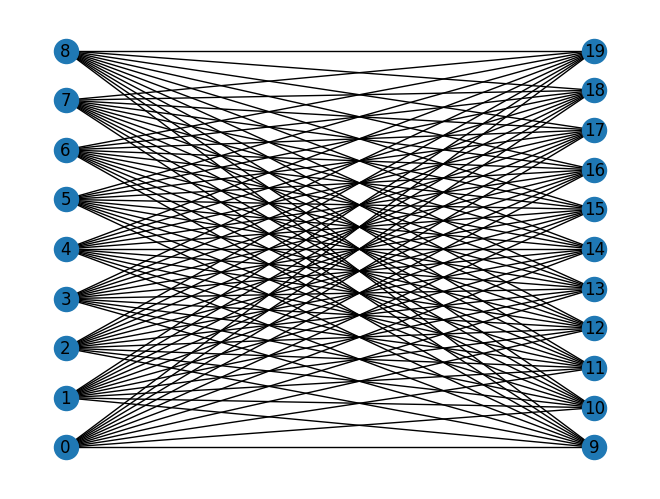

In [3]:
G = nx.Graph()
edges = []

n = 9
m = 11
for j in range(n,m + n):
    for i in range(n):
        edges.append((i, j))

gList = []

for i in range(n):
    gList.append(i)

print(edges)

G.add_edges_from(edges)
nx.draw(G,pos=nx.bipartite_layout(G, gList), with_labels=True)

In [4]:

pauli = []
def createSmp():
    smp = []
    for i in range(n + m):
        smp.append("I")
    return smp

for i in edges:
    smp = createSmp()
    for j in range(len(smp)):
        if j == i[0]:
            smp[j] = 'Z'
        if j == i[1]:
            smp[j] = 'Z'
    smp = smp[::-1]
    word = ''.join(smp)
    pauli.append(word)

print(pauli)
print(edges)

pauliList = []

for i in range(len(pauli)):
    pauliList.append((pauli[i], 1))

print(pauliList)

['IIIIIIIIIIZIIIIIIIIZ', 'IIIIIIIIIIZIIIIIIIZI', 'IIIIIIIIIIZIIIIIIZII', 'IIIIIIIIIIZIIIIIZIII', 'IIIIIIIIIIZIIIIZIIII', 'IIIIIIIIIIZIIIZIIIII', 'IIIIIIIIIIZIIZIIIIII', 'IIIIIIIIIIZIZIIIIIII', 'IIIIIIIIIIZZIIIIIIII', 'IIIIIIIIIZIIIIIIIIIZ', 'IIIIIIIIIZIIIIIIIIZI', 'IIIIIIIIIZIIIIIIIZII', 'IIIIIIIIIZIIIIIIZIII', 'IIIIIIIIIZIIIIIZIIII', 'IIIIIIIIIZIIIIZIIIII', 'IIIIIIIIIZIIIZIIIIII', 'IIIIIIIIIZIIZIIIIIII', 'IIIIIIIIIZIZIIIIIIII', 'IIIIIIIIZIIIIIIIIIIZ', 'IIIIIIIIZIIIIIIIIIZI', 'IIIIIIIIZIIIIIIIIZII', 'IIIIIIIIZIIIIIIIZIII', 'IIIIIIIIZIIIIIIZIIII', 'IIIIIIIIZIIIIIZIIIII', 'IIIIIIIIZIIIIZIIIIII', 'IIIIIIIIZIIIZIIIIIII', 'IIIIIIIIZIIZIIIIIIII', 'IIIIIIIZIIIIIIIIIIIZ', 'IIIIIIIZIIIIIIIIIIZI', 'IIIIIIIZIIIIIIIIIZII', 'IIIIIIIZIIIIIIIIZIII', 'IIIIIIIZIIIIIIIZIIII', 'IIIIIIIZIIIIIIZIIIII', 'IIIIIIIZIIIIIZIIIIII', 'IIIIIIIZIIIIZIIIIIII', 'IIIIIIIZIIIZIIIIIIII', 'IIIIIIZIIIIIIIIIIIIZ', 'IIIIIIZIIIIIIIIIIIZI', 'IIIIIIZIIIIIIIIIIZII', 'IIIIIIZIIIIIIIIIZIII', 'IIIIIIZIIIIIIIIZIIII', 'IIIIIIZIIIIIII

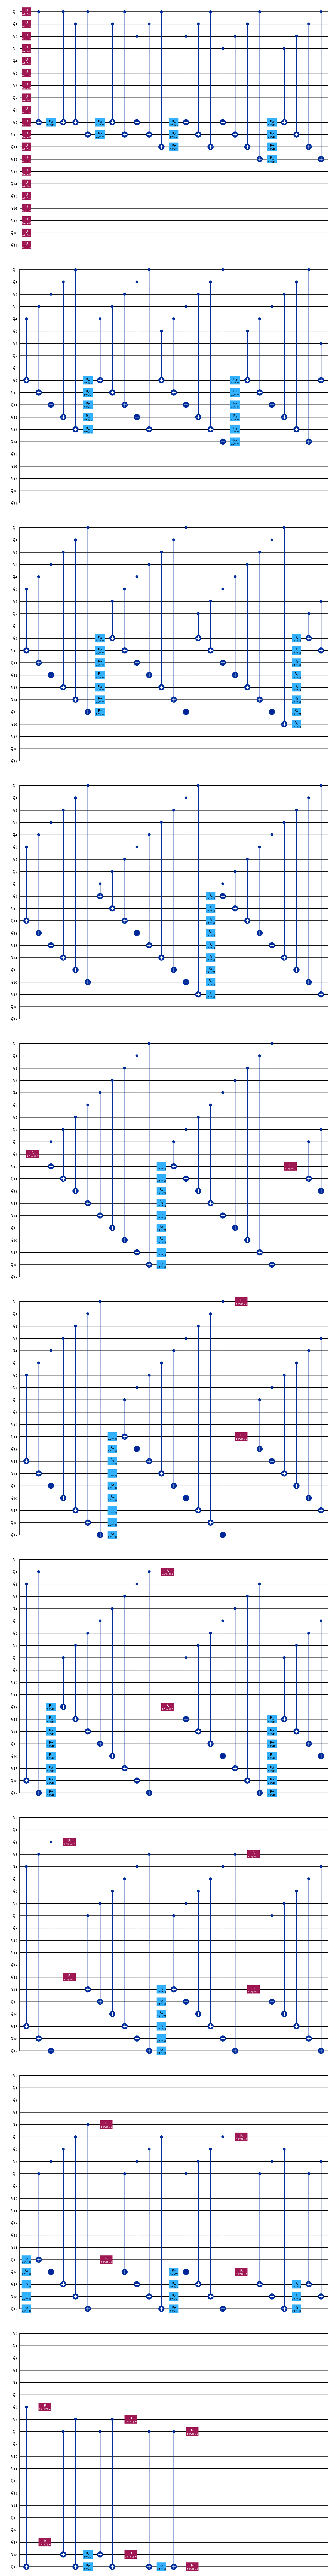

In [5]:
hamiltonian = SparsePauliOp.from_list(pauliList)

ansatz = QAOAAnsatz(hamiltonian, reps = 1)

ansatz.decompose(reps=4).draw(output='mpl')


In [6]:
def cost_func(params, ansatz, hamiltonian, estimator):

    pub = (ansatz, [hamiltonian], [params])
    result = estimator.run(pubs=[pub]).result()
    cost = result[0].data.evs[0]

    return cost

In [15]:
from qiskit.primitives import (
    Sampler,
    StatevectorSampler,
    Estimator,
    StatevectorEstimator,
)

estimator = StatevectorEstimator()
sampler = Sampler()

In [16]:
x0 = 2 * np.pi * np.random.rand(ansatz.num_parameters)

In [17]:
res = minimize(cost_func, x0, args=(ansatz, hamiltonian, estimator), method="COBYLA")
res

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -19.513364470539805
       x: [ 3.534e+00  8.015e+00]
    nfev: 43
   maxcv: 0.0

In [ ]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_aer import AerSimulator

qc = ansatz.assign_parameters(res.x)

qc.measure_all()

pm = generate_preset_pass_manager(backend=AerSimulator(), optimization_level=3, seed_transpiler=0)
qc_isa = pm.run(qc)
qc_isa.draw(output='mpl')

In [19]:
result = sampler.run([qc_isa]).result()
samp_dist = result.quasi_dists[0]

In [20]:
def convert_to_binary_states(quasi_dists, num_qubits):
    binary_dists = {}

    for index, probability in quasi_dists.items():
        binary_state = format(index, f'0{num_qubits}b')
        binary_dists[binary_state] = probability

    return binary_dists

stany = convert_to_binary_states(samp_dist, n + m)
max_key = max(stany, key=stany.get)
max_prob = stany[max_key]

print(max_prob)
print(max_key[::-1])

0.0138548097013215
11111111100000000000


In [21]:
def calculate_cut(edges, partition_state):
    num_cuts = 0
    for (i, j) in edges:
        if partition_state[i] != partition_state[j]:
            num_cuts += 1
    return num_cuts

num_cuts = calculate_cut(edges, max_key[::-1])
print(f"Number of cuts: {num_cuts}")

Number of cuts: 99


In [ ]:
plot_distribution(stany, figsize=(15, 5))

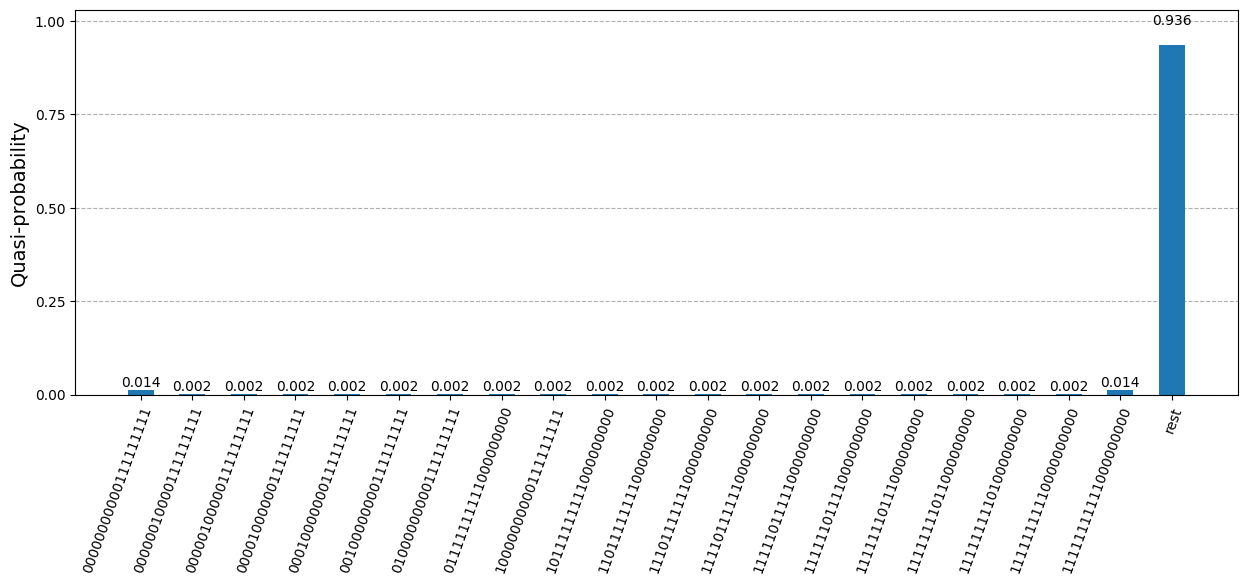

In [23]:
plot_distribution(stany, figsize=(15, 5),  number_to_keep=20)

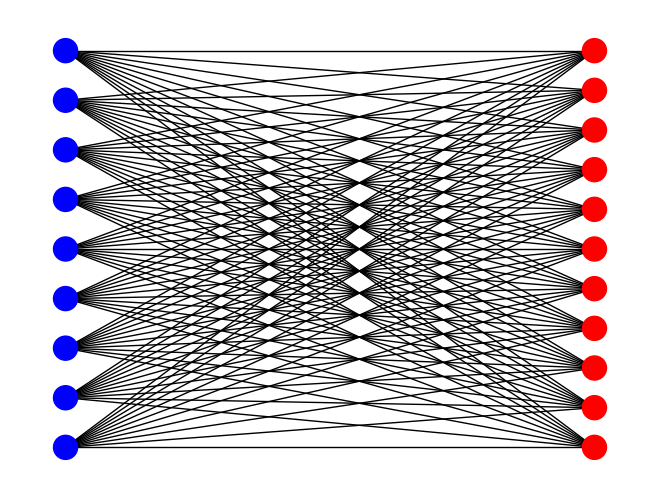

In [24]:
max_key = max_key[::-1]

colors = ['r' if max_key[node] == '0' else 'b' for node in G]
nx.draw(G,node_color = colors, pos=nx.bipartite_layout(G, gList))